# (Boostcourse) 프로젝트로 배우는 scikit-learn- Random Forest

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
df = pd.read_csv('diabetes_feature.csv')
df.shape

(768, 13)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,0,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,0,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,1,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,0,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,0,168.0,5.129899,False


## Split

In [5]:
from sklearn.model_selection import train_test_split

X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
        'Insulin_log', 'low_glu_insulin']]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print('train 개수: ', X_train.shape, y_train.shape)
print('test 개수: ', X_test.shape, y_test.shape)

train 개수:  (537, 9) (537,)
test 개수:  (231, 9) (231,)


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

model = RandomForestClassifier(random_state = 42)

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

### Feature importance 시각화

In [7]:
feature_importance=model.feature_importances_

<AxesSubplot:>

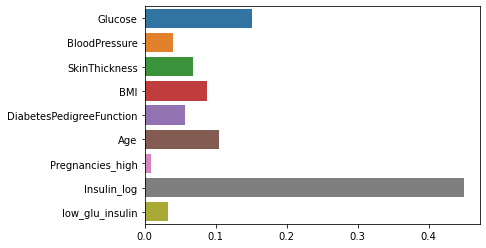

In [8]:
sns.barplot(x = feature_importance, y = X_train.columns)

### 정확도(Accuracy) 측정

In [11]:
pd.DataFrame(confusion_matrix(y_test, y_predict))

,0,1
0,135,16
1,13,67


In [14]:
report = metrics.classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       151
           1       0.81      0.84      0.82        80

    accuracy                           0.87       231
   macro avg       0.86      0.87      0.86       231
weighted avg       0.88      0.87      0.87       231

